## Below code is for getting figure in center alignment

In [ ]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}

</style>
""")

## Basic Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

## Reading CSV File

In [ ]:
pd.set_option("display.max_columns",None)
features_df = pd.read_csv("features.csv",index_col=0)
features_df.head(3)

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo


In the features csv file, we have 35 features

In [ ]:
labels_df = pd.read_csv("labels.csv",index_col=0)
labels_df.head(3)

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0


There are two target i.e. h1n1_vaccine & seasonal_vaccine

## For EDA , we merge two csv file 

In [ ]:
joined_df = pd.concat([features_df,labels_df],axis=1)
joined_df 

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,1.0,1.0,5.0,2.0,2.0,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN,0,0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,0,0
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,4.0,2.0,5.0,4.0,2.0,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,1


## Getting information of dataset

In [ ]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

In [ ]:
labels_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   h1n1_vaccine      26707 non-null  int64
 1   seasonal_vaccine  26707 non-null  int64
dtypes: int64(2)
memory usage: 625.9 KB


## Getting statistic information of dataset

In [ ]:
features_df.describe()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,24547.000000,25736.000000,25887.000000,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000
mean,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,0.329735,0.283261,0.082590,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583
std,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,0.470126,0.450591,0.275266,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


In [ ]:
labels_df.describe()

,h1n1_vaccine,seasonal_vaccine
count,26707.000000,26707.000000
mean,0.212454,0.465608
std,0.409052,0.498825
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,1.000000
max,1.000000,1.000000


## Checking Null value present in dataset

In [ ]:
nan_features_df = round(features_df.isna().sum()/features_df.shape[0] * 100,2)
nan_features_df

h1n1_concern                    0.34
h1n1_knowledge                  0.43
behavioral_antiviral_meds       0.27
behavioral_avoidance            0.78
behavioral_face_mask            0.07
behavioral_wash_hands           0.16
behavioral_large_gatherings     0.33
behavioral_outside_home         0.31
behavioral_touch_face           0.48
doctor_recc_h1n1                8.09
doctor_recc_seasonal            8.09
chronic_med_condition           3.64
child_under_6_months            3.07
health_worker                   3.01
health_insurance               45.96
opinion_h1n1_vacc_effective     1.46
opinion_h1n1_risk               1.45
opinion_h1n1_sick_from_vacc     1.48
opinion_seas_vacc_effective     1.73
opinion_seas_risk               1.92
opinion_seas_sick_from_vacc     2.01
age_group                       0.00
education                       5.27
race                            0.00
sex                             0.00
income_poverty                 16.56
marital_status                  5.27
r

In feature csv, <b> health_insurance ,employment_industry, employment_occupation  </b> are more number of missing values

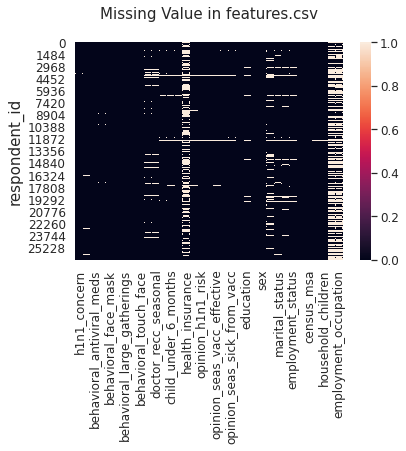

In [ ]:
sns.set(rc={"font.size":15,"axes.titlesize":15,"axes.labelsize":15,"xtick.labelsize":12,"ytick.labelsize":12,
            "legend.fontsize":12})

sns.heatmap(features_df.isna())
plt.title("Missing Value in features.csv\n")
plt.show()

In [ ]:
nan_labels_df = round(labels_df.isna().sum()/labels_df.shape[0] * 100,2)
nan_labels_df

h1n1_vaccine        0.0
seasonal_vaccine    0.0
dtype: float64

In label.csv file , there are no missing values

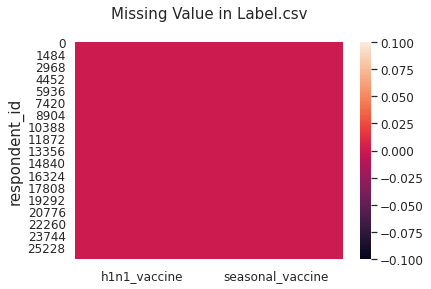

In [ ]:
sns.heatmap(labels_df.isna())
plt.title("Missing Value in Label.csv\n")
plt.show()

## Checking duplicate values

In [ ]:
features_df.duplicated().sum()

0

##  Data Analysis

In [ ]:
obj_data = features_df.select_dtypes(include="object")
obj_data

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,
0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,NaN,NaN
1,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",pxcmvdjn,xgwztkwe
2,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",rucpziij,xtkaffoo
3,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",NaN,NaN
4,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...
26702,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,NaN,NaN
26703,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",fcxhlnwr,cmhcxjea
26704,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",NaN,NaN


## Age Analysis

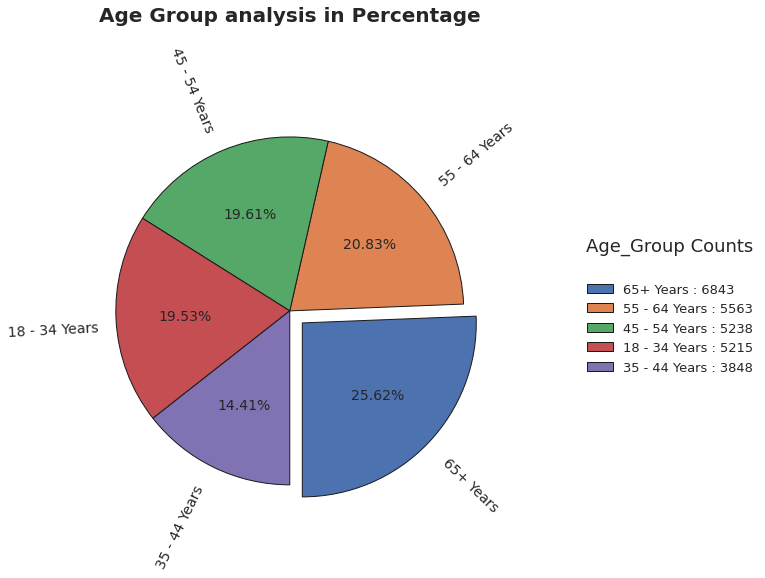

In [ ]:
percent=[]
for i in obj_data['age_group'].value_counts():
    percent.append(i)
    
wedgeprops = {"linewidth": 1, 'width':1, "edgecolor":"k"}
textprops = {"fontsize":14}
explode = [0.1,0,0,0,0]
plt.figure(figsize = (8,8))
plt.pie(percent,labels = ['65+ Years', '55 - 64 Years', '45 - 54 Years', '18 - 34 Years',
       '35 - 44 Years'],
        explode=explode, autopct = "%0.2f%%", startangle = 270,
        wedgeprops = wedgeprops,textprops = textprops,rotatelabels=True) 
plt.title("Age Group analysis in Percentage\n\n\n",fontsize=20,fontweight='bold')
legend=plt.legend(bbox_to_anchor=(1.05, 0.8), 
           loc=0, 
           borderaxespad=4, 
           labels=["65+ Years : 6843","55 - 64 Years : 5563","45 - 54 Years : 5238","18 - 34 Years : 5215",
                   "35 - 44 Years : 3848"],
            fontsize=13)
legend.set_title("Age_Group Counts\n",prop={"size":18})
legend.draw_frame(False)
plt.show()

In given datatset, 65+ year person are more in number and after that 55-64 year person group in number.<br>
35-44 year age group people are least in number inn given dataset.<br>
The dataset consist old age people more in number compare to young age people

## Age analysis with Gender

In [ ]:
print("\033[1m\nCount of age group with Gender :")
pd.crosstab(joined_df['age_group'], joined_df['sex'], margins=True)


Count of age group with Gender :


sex,Female,Male,All
age_group,,,
18 - 34 Years,2808,2407,5215
35 - 44 Years,2247,1601,3848
45 - 54 Years,3148,2090,5238
55 - 64 Years,3268,2295,5563
65+ Years,4387,2456,6843
All,15858,10849,26707


In [ ]:
print("\033[1m\nPercentage Count of age group with Gender : ")
age_vs_sex = pd.crosstab(joined_df['age_group'], joined_df['sex'], margins=True,normalize=True)
round(age_vs_sex.multiply(100),2)


Percentage Count of age group with Gender : 


sex,Female,Male,All
age_group,,,
18 - 34 Years,10.51,9.01,19.53
35 - 44 Years,8.41,5.99,14.41
45 - 54 Years,11.79,7.83,19.61
55 - 64 Years,12.24,8.59,20.83
65+ Years,16.43,9.20,25.62
All,59.38,40.62,100.00


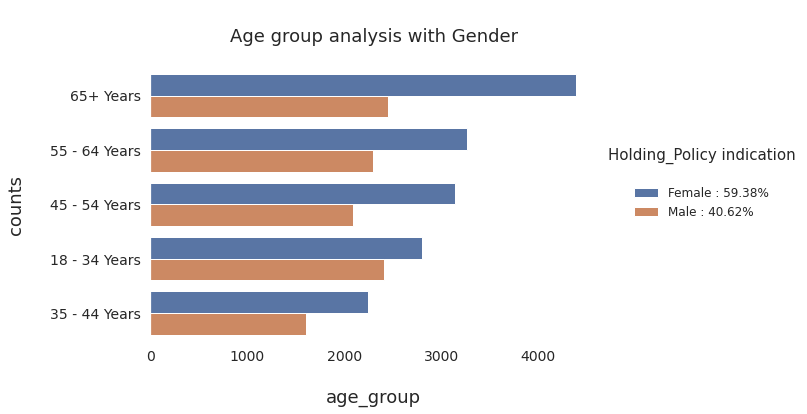

In [ ]:
plt.figure(figsize=(8,5))
sns.set(rc={"font.size":12,"axes.titlesize":18,"axes.labelsize":18,"xtick.labelsize":14,"ytick.labelsize":14,
            "legend.fontsize":12,'axes.grid' : False,'axes.facecolor': 'white'})
sns.countplot(y='age_group',order = joined_df['age_group'].value_counts().index,hue='sex',data=joined_df)
plt.title("\nAge group analysis with Gender\n")
plt.xlabel("\nage_group")
plt.ylabel("counts\n")
legend = plt.legend(bbox_to_anchor=(1, 0.75),
          labels=["Female : 59.38%","Male : 40.62%"],
          title = "Holding_Policy indication\n")
legend.set_title("Holding_Policy indication\n",prop={"size":15})
legend.draw_frame(False)
plt.show()

From above figure, we observe that dataset consist of more number of female comare to male in every age group.<br>
The age group belongs from 18-34 years have near about equal number of male & feamle.<br>
More number of female & male are present in 65+ year age group.<br>
Less number of male & female are present in 35-44 Years age group


## Age analysis with Education

In [ ]:
print("\033[1m\nCount of age group with education :")
pd.crosstab(joined_df['age_group'], joined_df['education'], margins=True)


Count of age group with education :


education,12 Years,< 12 Years,College Graduate,Some College,All
age_group,,,,,
18 - 34 Years,1106,503,1699,1535,4843
35 - 44 Years,588,251,1773,934,3546
45 - 54 Years,1074,339,2121,1445,4979
55 - 64 Years,1154,387,2394,1440,5375
65+ Years,1875,883,2110,1689,6557
All,5797,2363,10097,7043,25300


In [ ]:
print("\033[1m\nPercent count of age group with education :")
age_vs_edu =pd.crosstab(joined_df['age_group'], joined_df['education'], margins=True,normalize=True)
round(age_vs_edu.multiply(100),2)


Percent count of age group with education :


education,12 Years,< 12 Years,College Graduate,Some College,All
age_group,,,,,
18 - 34 Years,4.37,1.99,6.72,6.07,19.14
35 - 44 Years,2.32,0.99,7.01,3.69,14.02
45 - 54 Years,4.25,1.34,8.38,5.71,19.68
55 - 64 Years,4.56,1.53,9.46,5.69,21.25
65+ Years,7.41,3.49,8.34,6.68,25.92
All,22.91,9.34,39.91,27.84,100.00


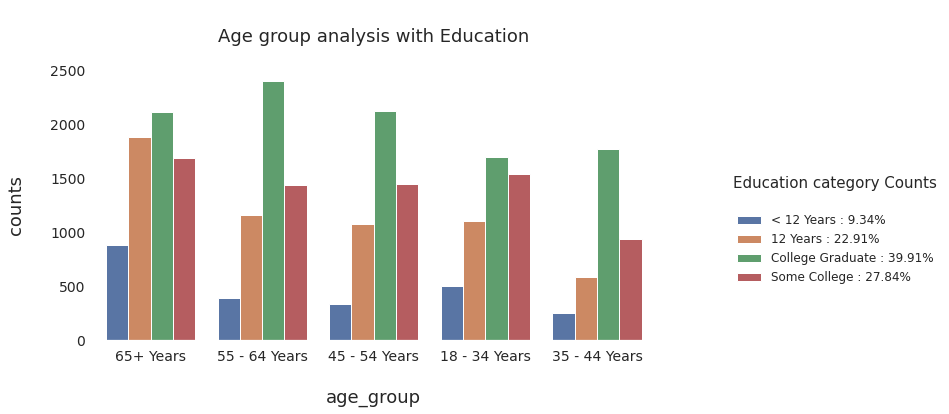

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot('age_group',order = joined_df['age_group'].value_counts().index,hue='education',data=joined_df)
plt.title("\nAge group analysis with Education\n")
plt.xlabel("\nage_group")
plt.ylabel("counts\n")
legend = plt.legend(bbox_to_anchor=(1.05, 0.8), 
           loc=0, 
           borderaxespad=4, 
           labels=["< 12 Years : 9.34%","12 Years : 22.91%","College Graduate : 39.91%","Some College : 27.84%"],
           )
legend.set_title("Education category Counts\n",prop={"size":15})
legend.draw_frame(False)
plt.show()

Analysis between age group & Education:<br>
In every age group, College graduate are more in number while person takes education less than 12 year are least in number.<br>
The education category  i.e <b>Some College </b> are second more number are present in dataset


## Age analysis with Race

In [ ]:
print("\033[1m\nCount of age group with race :")
pd.crosstab(joined_df['age_group'], joined_df['race'], margins=True)


Count of age group with race :


race,Black,Hispanic,Other or Multiple,White,All
age_group,,,,,
18 - 34 Years,492,667,475,3581,5215
35 - 44 Years,337,379,286,2846,3848
45 - 54 Years,423,314,307,4194,5238
55 - 64 Years,416,217,268,4662,5563
65+ Years,450,178,276,5939,6843
All,2118,1755,1612,21222,26707


In [ ]:
print("\033[1m\nPercent count of age group with race :")
age_vs_race = pd.crosstab(joined_df['age_group'], joined_df['race'], margins=True,normalize=True)
round(age_vs_race.multiply(100),2)


Percent count of age group with race :


race,Black,Hispanic,Other or Multiple,White,All
age_group,,,,,
18 - 34 Years,1.84,2.50,1.78,13.41,19.53
35 - 44 Years,1.26,1.42,1.07,10.66,14.41
45 - 54 Years,1.58,1.18,1.15,15.70,19.61
55 - 64 Years,1.56,0.81,1.00,17.46,20.83
65+ Years,1.68,0.67,1.03,22.24,25.62
All,7.93,6.57,6.04,79.46,100.00


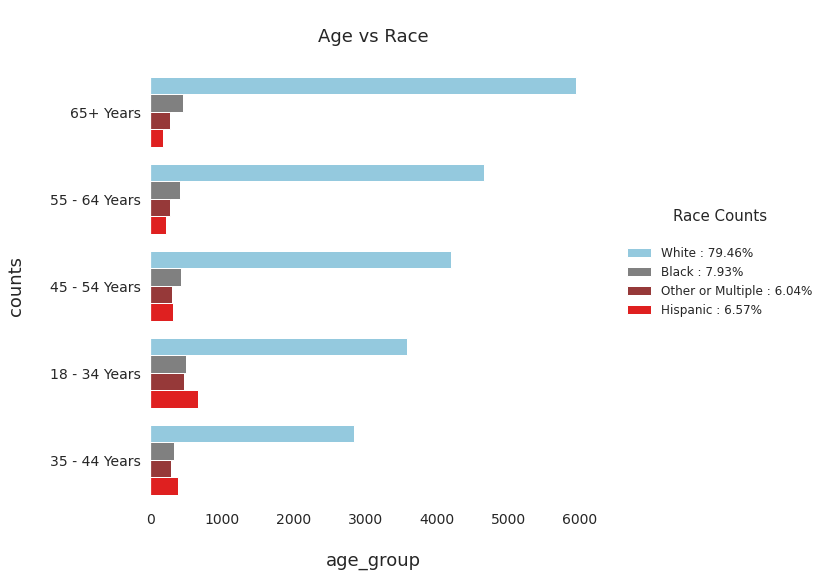

In [ ]:
#sns.set(rc={'figure.facecolor':'orange'})
#plt.style.use('dark_background')
plt.figure(figsize=(8,8))
sns.countplot(y='age_group',order = joined_df['age_group'].value_counts().index,hue='race',data=joined_df,palette=["skyblue","grey","brown","red"])
plt.title("\nAge vs Race\n")
plt.xlabel("\nage_group")
plt.ylabel("counts\n")
legend = plt.legend(bbox_to_anchor=(0.95, 0.8), 
           loc=0, 
           borderaxespad=4, 
           labels=["White : 79.46%","Black : 7.93%","Other or Multiple : 6.04%","Hispanic : 6.57%"],
          title = "Race Counts\n")
legend.set_title("Race Counts\n",prop={"size":15})
legend.draw_frame(False)
plt.show()


In abover figure<br>
Given dataset consists more number of <b>White</b> skin people while <b> Other or Multiple</b> skin people are less in number<br>
In <b>18-34 Years</b> age group after white skin people,Hispanic skin color having second count in number<br>
In <b>45-54 Years</b> age group equal number of black & Other or multiple skin type people are present 

## Age analysis with Marital status

In [ ]:
print("\033[1m\nPercent count of age group with marital status :")
age_vs_marrage = pd.crosstab(joined_df['marital_status'], joined_df['age_group'],margins=True,normalize=True)
round(age_vs_marrage.multiply(100),2)


Percent count of age group with marital status :


age_group,18 - 34 Years,35 - 44 Years,45 - 54 Years,55 - 64 Years,65+ Years,All
marital_status,,,,,,
Married,7.52,9.13,12.08,12.82,12.02,53.58
Not Married,11.59,4.87,7.57,8.40,13.99,46.42
All,19.11,14.00,19.65,21.22,26.01,100.00


In [ ]:
print("\033[1m\nCount of age group with marital status :")
pd.crosstab(joined_df['marital_status'], joined_df['age_group'],margins=True)


Count of age group with marital status :


age_group,18 - 34 Years,35 - 44 Years,45 - 54 Years,55 - 64 Years,65+ Years,All
marital_status,,,,,,
Married,1902,2311,3057,3243,3042,13555
Not Married,2933,1232,1914,2126,3539,11744
All,4835,3543,4971,5369,6581,25299


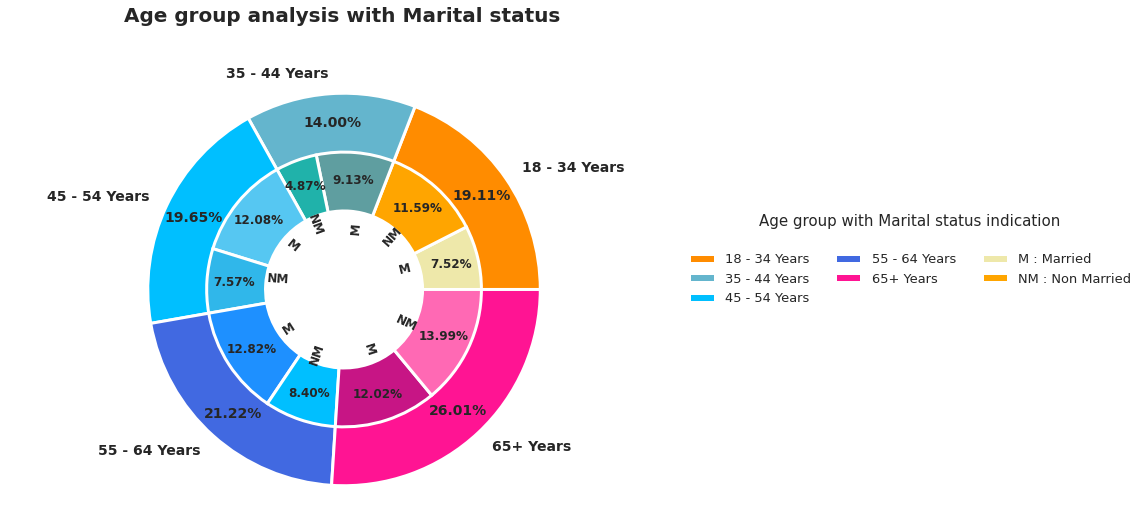

In [ ]:
plt.figure(figsize=(12,8))
plt.title("Age group analysis with Marital status\n\n",fontsize=20,fontweight="bold")
plt.pie([4835,3543,4971,5369,6581], radius=1,
        colors=['darkorange', 'C','deepskyblue','royalblue',"deeppink"],
        labels=['18 - 34 Years','35 - 44 Years','45 - 54 Years','55 - 64 Years','65+ Years'], 
        autopct='%.2f%%',
        pctdistance=0.85, textprops = {"fontsize":14,"fontweight":"bold"},
        wedgeprops=dict(width=0.6, edgecolor='white',linewidth=3))

plt.pie([1902,2933,2311,1232,3057,1914,3243,2126,3042,3539], radius=0.7,
        colors=['palegoldenrod','orange', 'cadetblue', 'lightseagreen',
                '#56C7F2','#30B7EA','dodgerblue', 'deepskyblue',"mediumvioletred","hotpink"],
        wedgeprops=dict(width=0.3, edgecolor='w',linewidth=3),textprops = {"fontsize":12,"fontweight":"bold"},
         labels=['M','NM','M','NM','M','NM','M',
                 'NM','M','NM'],autopct='%.2f%%',
        pctdistance=0.8, labeldistance=0.4,rotatelabels=True )

legend = plt.legend(bbox_to_anchor=(1, 0.7),
          labels=['18 - 34 Years','35 - 44 Years','45 - 54 Years','55 - 64 Years','65+ Years',
                  "M : Married","NM : Non Married"],
          title = "Age group with Marital status indication\n",
          ncol=3,
          fontsize=13)
legend.set_title("Age group with Marital status indication\n",prop={"size":15})
legend.draw_frame(False)

plt.axis('equal')
plt.show()

So, here we get some interest facts from the dataset:<br>
In <b>65+ Years</b> age group ,14% are non married people while 12 % are m,arried people<br>
In <b>55-64%</b> age group, 12.82 % are married people while 8.40% are non married people<br>
Total number of married people in dataset is <b>53.58%</b>while non married people are <b>42.42%</b>

## Age group analysis with income proverty

In [ ]:
print("\033[1m\nPercent count of age group with income poverty :")
age_vs_income = pd.crosstab(joined_df['age_group'], joined_df['income_poverty'],margins=True,normalize=True)
round(age_vs_income.multiply(100),2)


Percent count of age group with income poverty :


income_poverty,"<= $75,000, Above Poverty","> $75,000",Below Poverty,All
age_group,,,,
18 - 34 Years,10.53,5.21,3.93,19.66
35 - 44 Years,6.72,6.39,1.69,14.80
45 - 54 Years,10.17,8.25,1.89,20.32
55 - 64 Years,12.45,7.27,1.79,21.50
65+ Years,17.46,3.44,2.81,23.71
All,57.34,30.56,12.10,100.00


In [ ]:
print("\033[1m\nCount of age group with income poverty :")
pd.crosstab(joined_df['age_group'], joined_df['income_poverty'],margins=True)


Count of age group with income poverty :


income_poverty,"<= $75,000, Above Poverty","> $75,000",Below Poverty,All
age_group,,,,
18 - 34 Years,2347,1160,875,4382
35 - 44 Years,1498,1425,376,3299
45 - 54 Years,2267,1838,422,4527
55 - 64 Years,2774,1620,398,4792
65+ Years,3891,767,626,5284
All,12777,6810,2697,22284


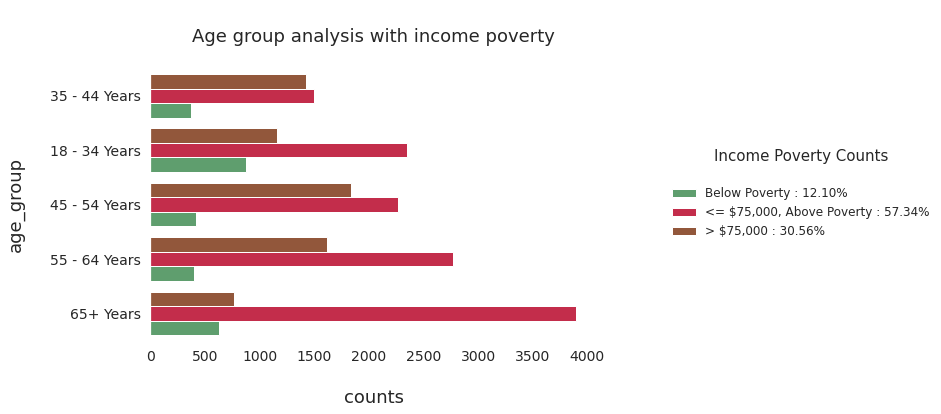

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(y='age_group',order = joined_df['age_group'].value_counts().index,hue='income_poverty',data=joined_df,palette=["g",'crimson','sienna'])
plt.title("\nAge group analysis with income poverty\n")
plt.xlabel("\ncounts")
plt.ylabel("age_group\n")
legend = plt.legend(bbox_to_anchor=(1.05, 0.9), 
           loc=0, 
           borderaxespad=4, 
          labels=["Below Poverty : 12.10%","<= $75,000, Above Poverty : 57.34%","> $75,000 : 30.56%"])
legend.set_title("Income Poverty Counts\n",prop={"size":15})
legend.draw_frame(False)
plt.gca().invert_yaxis()
plt.show()

## Age group analysis with Housing situation of respondent

In [ ]:
print("\033[1m\nPercent count of age group with housing situation of respondent :")
age_vs_house = pd.crosstab(joined_df['age_group'], joined_df['rent_or_own'],margins=True,normalize=True)
round(age_vs_house.multiply(100),2)


Percent count of age group with housing situation of respondent :


rent_or_own,Own,Rent,All
age_group,,,
18 - 34 Years,10.23,8.97,19.20
35 - 44 Years,10.47,3.59,14.06
45 - 54 Years,15.95,3.84,19.79
55 - 64 Years,17.93,3.31,21.24
65+ Years,21.38,4.33,25.72
All,75.96,24.04,100.00


In [ ]:
print("\033[1m\nCount of age group with housing situation of respondent :")
pd.crosstab(joined_df['age_group'], joined_df['rent_or_own'],margins=True)


Count of age group with housing situation of respondent :


rent_or_own,Own,Rent,All
age_group,,,
18 - 34 Years,2524,2212,4736
35 - 44 Years,2582,885,3467
45 - 54 Years,3933,947,4880
55 - 64 Years,4423,816,5239
65+ Years,5274,1069,6343
All,18736,5929,24665


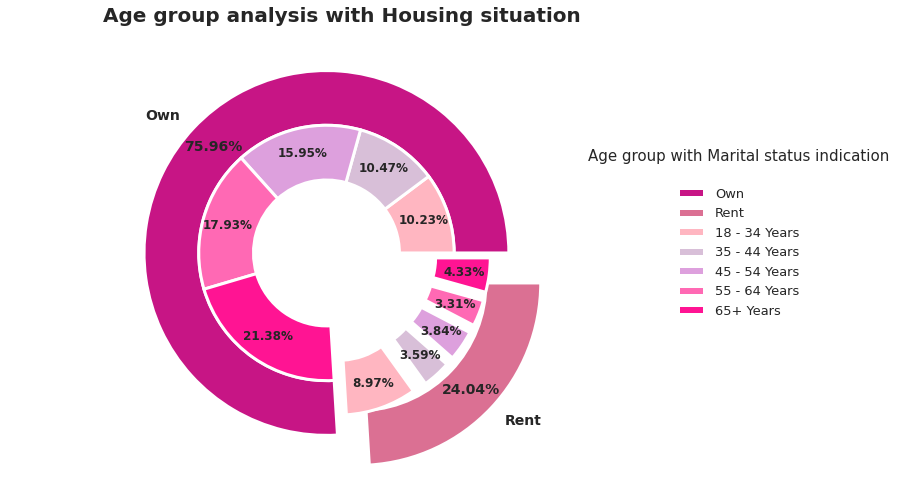

In [ ]:
plt.figure(figsize=(12,8))
plt.title("Age group analysis with Housing situation\n",fontsize=20,fontweight="bold")


plt.pie([18736,5929], radius=1,
        colors=["mediumvioletred","palevioletred"],
        wedgeprops=dict(width=0.3, edgecolor='w',linewidth=3),textprops = {"fontsize":14,"fontweight":"bold"},
         labels=["Own","Rent"],autopct='%.2f%%',explode = [0,0.24],
        pctdistance=0.85, labeldistance=1.1, )

plt.pie([2524,2582,3933,4423,5274,2212,885,947,816,1069], radius=0.7,
        colors=["lightpink","thistle","plum","hotpink","deeppink"],
        wedgeprops=dict(width=0.3, edgecolor='w',linewidth=3),textprops = {"fontsize":12,"fontweight":"bold"},
         autopct='%.2f%%',explode = [0,0,0,0,0,0.2,0.2,0.2,0.2,0.2],
        pctdistance=0.8, labeldistance=0.4, )

legend = plt.legend(bbox_to_anchor=(0.85, 0.8),
          labels=['Own','Rent','18 - 34 Years','35 - 44 Years','45 - 54 Years','55 - 64 Years','65+ Years'],
          fontsize=13)
legend.set_title("Age group with Marital status indication\n",prop={"size":15})
legend.draw_frame(False)

plt.axis('equal')
plt.show()

In given dataset, <b>75.96%</b> are Own housing people while <b>24.014%</b> are rent housing people.<br>
In Own housing people, <b>21.38%</b> people are belongs from <b>65+ year age group</b> which is high in number while <b>10.23%</b> people are belongs from <b>18-34 years age group</b> which is least in number<br>
In Rent housing people, <b>8.97%</b> people are belongs from <b>18-34 years age group</b> which is high in number while <b>3.31%</b> people are belongs from <b>55-64 years age group</b> which is least in number<br>

## Age group analysis with Employment status

In [ ]:
print("\033[1m\nCount of age group with employment status of respondent :")
pd.crosstab(joined_df['age_group'], joined_df['employment_status'],margins=True)


Count of age group with employment status of respondent :


employment_status,Employed,Not in Labor Force,Unemployed,All
age_group,,,,
18 - 34 Years,3000,1379,431,4810
35 - 44 Years,2713,597,228,3538
45 - 54 Years,3720,868,373,4961
55 - 64 Years,3112,1938,316,5366
65+ Years,1015,5449,105,6569
All,13560,10231,1453,25244


In [ ]:
print("\033[1m\nPercent count of age group with employment status of respondent :")
age_vs_employ_status = pd.crosstab(joined_df['age_group'], joined_df['employment_status'],margins=True,normalize=True)
round(age_vs_employ_status.multiply(100),2)


Percent count of age group with employment status of respondent :


employment_status,Employed,Not in Labor Force,Unemployed,All
age_group,,,,
18 - 34 Years,11.88,5.46,1.71,19.05
35 - 44 Years,10.75,2.36,0.90,14.02
45 - 54 Years,14.74,3.44,1.48,19.65
55 - 64 Years,12.33,7.68,1.25,21.26
65+ Years,4.02,21.59,0.42,26.02
All,53.72,40.53,5.76,100.00


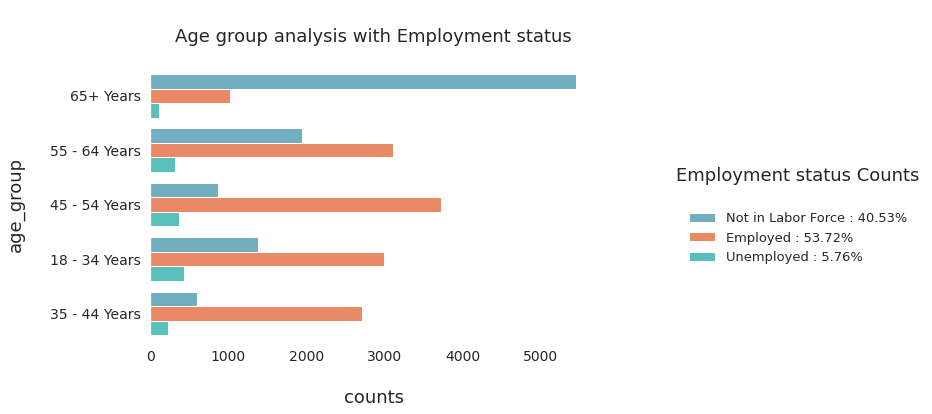

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(y='age_group',order = joined_df['age_group'].value_counts().index,hue='employment_status',data=joined_df,palette=["c",'coral','mediumturquoise'])
legend = plt.legend(bbox_to_anchor=(1.05, 0.85), 
           loc=0, 
           borderaxespad=4, 
           labels=["Not in Labor Force : 40.53%","Employed : 53.72%","Unemployed : 5.76%"],
           fontsize=13,
          )
legend.set_title("Employment status Counts\n",prop={'size':18})
legend.draw_frame(False)
plt.title("\nAge group analysis with Employment status\n")
plt.xlabel("\ncounts")
plt.ylabel("age_group\n")
plt.show()

In given dataset, in every age group having more employed people except 65+ Year age group people.<br>
The Unemployed people is less which shows good employment status

## Age analysis with Respondent's residence 

In [ ]:
print("\033[1m\nCount of age group with Respondent's residence :")
pd.crosstab(joined_df['age_group'], joined_df['hhs_geo_region'],margins=True)


Count of age group with Respondent's residence :


hhs_geo_region,atmpeygn,bhuqouqj,dqpwygqj,fpwskwrf,kbazzjca,lrircsnp,lzgpxyit,mlyzmhmf,oxchjgsf,qufhixun,All
age_group,,,,,,,,,,,
18 - 34 Years,397,489,234,641,553,456,797,444,607,597,5215
35 - 44 Years,289,421,186,512,399,309,570,329,392,441,3848
45 - 54 Years,365,635,224,637,530,422,839,437,553,596,5238
55 - 64 Years,408,589,216,677,607,414,914,458,607,673,5563
65+ Years,574,712,266,798,769,477,1177,575,700,795,6843
All,2033,2846,1126,3265,2858,2078,4297,2243,2859,3102,26707


In [ ]:
print("\033[1m\nPercent count of age group with Respondent's residence :")
age_vs_residence = pd.crosstab(joined_df['age_group'], joined_df['hhs_geo_region'],margins=True,normalize=True)
round(age_vs_residence.multiply(100),2)


Percent count of age group with Respondent's residence :


hhs_geo_region,atmpeygn,bhuqouqj,dqpwygqj,fpwskwrf,kbazzjca,lrircsnp,lzgpxyit,mlyzmhmf,oxchjgsf,qufhixun,All
age_group,,,,,,,,,,,
18 - 34 Years,1.49,1.83,0.88,2.40,2.07,1.71,2.98,1.66,2.27,2.24,19.53
35 - 44 Years,1.08,1.58,0.70,1.92,1.49,1.16,2.13,1.23,1.47,1.65,14.41
45 - 54 Years,1.37,2.38,0.84,2.39,1.98,1.58,3.14,1.64,2.07,2.23,19.61
55 - 64 Years,1.53,2.21,0.81,2.53,2.27,1.55,3.42,1.71,2.27,2.52,20.83
65+ Years,2.15,2.67,1.00,2.99,2.88,1.79,4.41,2.15,2.62,2.98,25.62
All,7.61,10.66,4.22,12.23,10.70,7.78,16.09,8.40,10.71,11.61,100.00


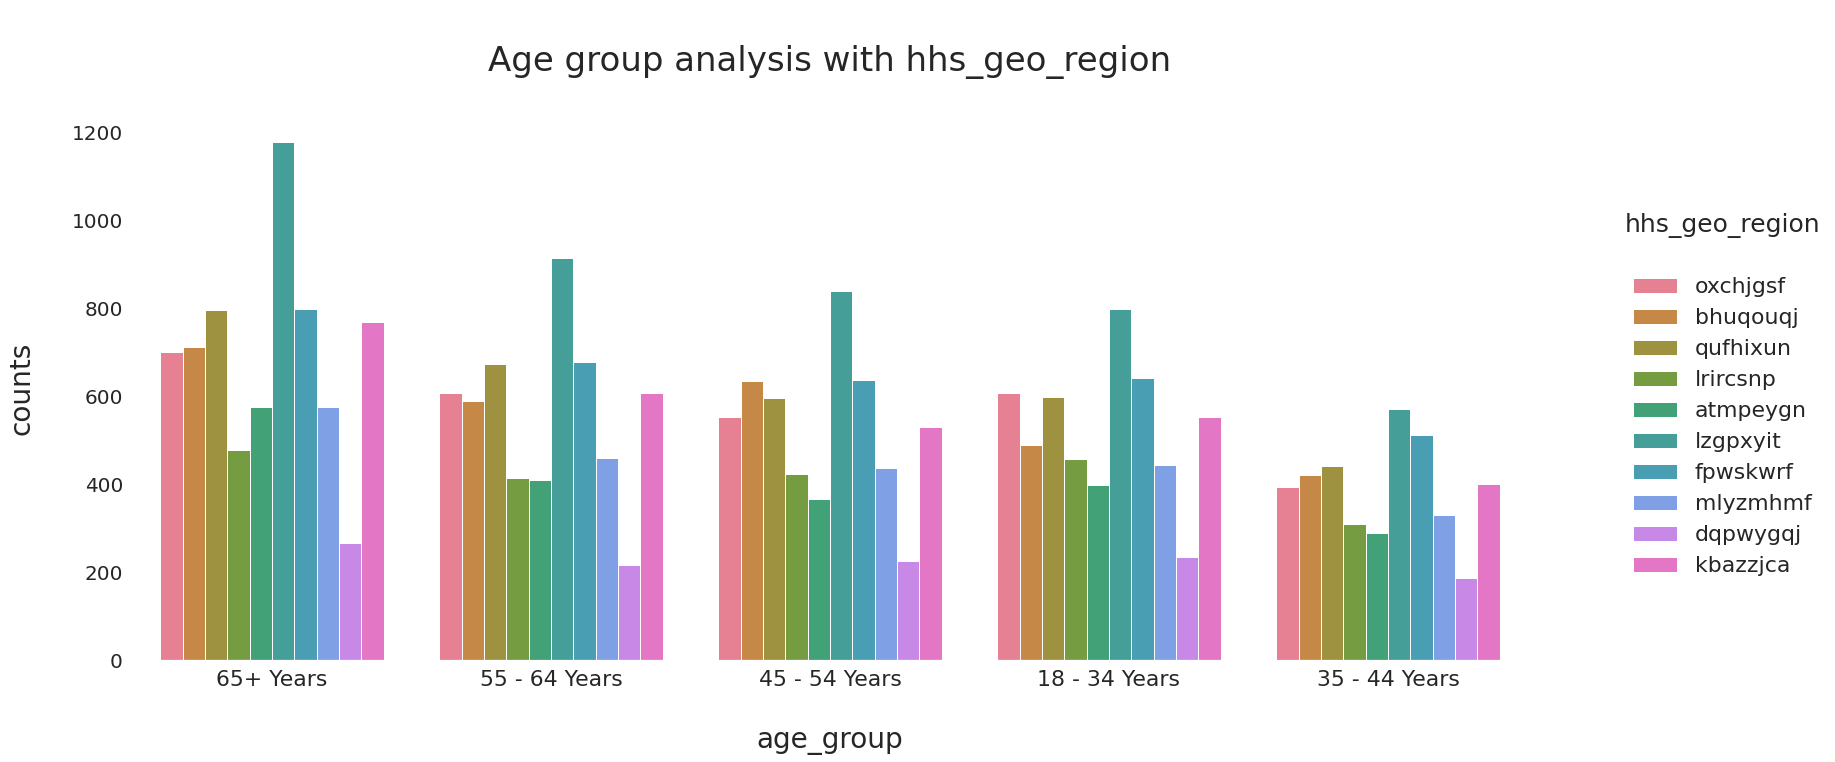

In [ ]:
plt.figure(figsize=(25,10))
sns.set(rc={"font.size":20,"axes.titlesize":23,"axes.labelsize":23,"xtick.labelsize":22,"ytick.labelsize":20,
            "legend.fontsize":12,'axes.grid' : False,'axes.facecolor': 'white'})
sns.countplot('age_group',order = joined_df['age_group'].value_counts().index,hue='hhs_geo_region',data=joined_df,palette='husl')
legend = plt.legend(bbox_to_anchor=(1, 1),
           loc=0, 
           borderaxespad=4, 
           fontsize=22)
legend.set_title("hhs_geo_region\n", prop = {'size':25})
legend.draw_frame(False)
plt.title("\nAge group analysis with hhs_geo_region\n",fontsize=34)
plt.xlabel("\nage_group",fontsize=28)
plt.ylabel("counts\n",fontsize=28)
plt.show()

From above figure, we can observe that:<br>
In every age group, mostly people are from <b>Izgpxyit</b> gegraphical region while minimally people are from <b>dqpwygqj</b> geographical region

## Age analysis with Level of concern about the H1N1 flu

In [ ]:
print("\033[1m\nCount of age group with concern about H1N1 flu :")
pd.crosstab(joined_df['age_group'], joined_df['h1n1_concern'],margins=True)


Count of age group with concern about H1N1 flu :


h1n1_concern,0.0,1.0,2.0,3.0,All
age_group,,,,,
18 - 34 Years,834,1869,1811,697,5211
35 - 44 Years,395,1183,1568,696,3842
45 - 54 Years,567,1479,2326,859,5231
55 - 64 Years,584,1669,2318,975,5546
65+ Years,916,1953,2552,1364,6785
All,3296,8153,10575,4591,26615


In [ ]:
print("\033[1m\nPercent count of age group with concern about H1N1 flu :")
age_vs_h1n1_concern = pd.crosstab(joined_df['age_group'], joined_df['h1n1_concern'],margins=True,normalize=True)
round(age_vs_h1n1_concern.multiply(100),2)


Percent count of age group with concern about H1N1 flu :


h1n1_concern,0.0,1.0,2.0,3.0,All
age_group,,,,,
18 - 34 Years,3.13,7.02,6.80,2.62,19.58
35 - 44 Years,1.48,4.44,5.89,2.62,14.44
45 - 54 Years,2.13,5.56,8.74,3.23,19.65
55 - 64 Years,2.19,6.27,8.71,3.66,20.84
65+ Years,3.44,7.34,9.59,5.12,25.49
All,12.38,30.63,39.73,17.25,100.00


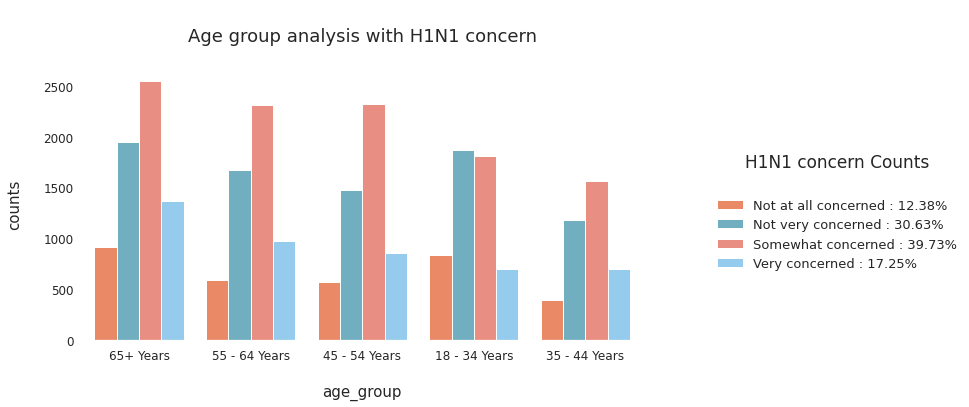

In [ ]:
plt.figure(figsize=(10,5))
sns.set(rc={"font.size":20,"axes.titlesize":18,"axes.labelsize":15,"xtick.labelsize":12,"ytick.labelsize":12,
            "legend.fontsize":12,'axes.grid' : False,'axes.facecolor': 'white'})
sns.countplot('age_group',order = joined_df['age_group'].value_counts().index,hue='h1n1_concern',data=joined_df,palette=["coral",'c','salmon','lightskyblue'])
legend=plt.legend(bbox_to_anchor=(1.08, 0.8), 
           loc=0, 
           borderaxespad=2, 
           labels=["Not at all concerned : 12.38%","Not very concerned : 30.63%","Somewhat concerned : 39.73%","Very concerned : 17.25%"],
           fontsize=13)
legend.set_title("H1N1 concern Counts\n",prop={"size":17})
legend.draw_frame(False)
plt.title("\nAge group analysis with H1N1 concern\n")
plt.xlabel("\nage_group")
plt.ylabel("counts\n")
plt.show()

In every age group , we can observe from figure i.e. people are Somewhat Concerned about H1N1 virus which is good<br>
65+ year age people are more in number so, they have Somewhat concern about H1N1 virus more in number<br>

## Age analysis with H1N1 knowledge

In [ ]:
print("\033[1m\nPercent count of age group with concern about H1N1 knowledge :")
pd.crosstab(joined_df['age_group'], joined_df['h1n1_knowledge'],margins=True)


Percent count of age group with concern about H1N1 knowledge :


h1n1_knowledge,0.0,1.0,2.0,All
age_group,,,,
18 - 34 Years,442,3254,1510,5206
35 - 44 Years,236,2075,1527,3838
45 - 54 Years,349,2663,2214,5226
55 - 64 Years,401,2865,2270,5536
65+ Years,1078,3741,1966,6785
All,2506,14598,9487,26591


In [ ]:
print("\033[1m\nPercent count of age group with concern about H1N1 knowledge :")
age_vs_h1n1_knowledge = pd.crosstab(joined_df['age_group'], joined_df['h1n1_knowledge'],margins=True,normalize=True)
round(age_vs_h1n1_knowledge.multiply(100),2)


Percent count of age group with concern about H1N1 knowledge :


h1n1_knowledge,0.0,1.0,2.0,All
age_group,,,,
18 - 34 Years,1.66,12.24,5.68,19.58
35 - 44 Years,0.89,7.80,5.74,14.43
45 - 54 Years,1.31,10.01,8.33,19.65
55 - 64 Years,1.51,10.77,8.54,20.82
65+ Years,4.05,14.07,7.39,25.52
All,9.42,54.90,35.68,100.00


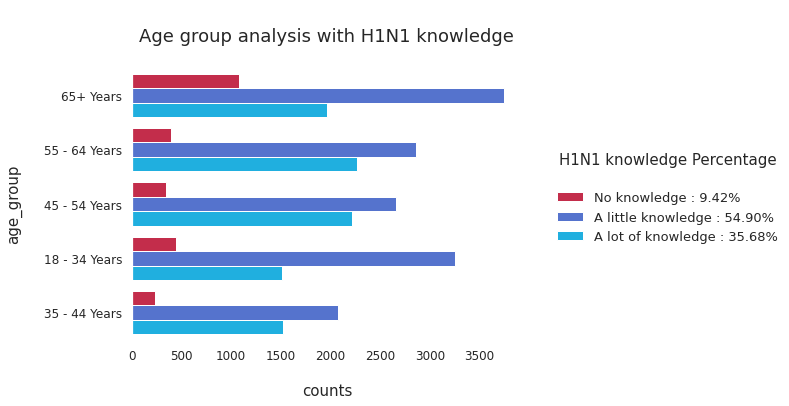

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(y ='age_group',order = joined_df['age_group'].value_counts().index,hue='h1n1_knowledge',data=joined_df,palette=["crimson",'royalblue','deepskyblue'])
legend=plt.legend(bbox_to_anchor=(1.8, 0.9), 
           loc=0, 
           borderaxespad=4, 
           labels=["No knowledge : 9.42%","A little knowledge : 54.90%","A lot of knowledge : 35.68%"],
           title = "H1N1 knowledge Percentage\n",fontsize=13)
legend.set_title("H1N1 knowledge Percentage\n",prop={"size":15})
legend.draw_frame(False)
plt.title("\nAge group analysis with H1N1 knowledge\n")
plt.ylabel("age_group\n")
plt.xlabel("\ncounts")
plt.show()

From above figure , we can get insight i.e. <br>
In every age group person have little knowledge about H1N1 virus which is good thing.
In over all dataset, No knowledge about H1N1 virus is 9.42% while lot of knowledge about H1N1 virus is 35.68 & little knowledge about h1n1 virus is 54.90%

## Age analysis with H1N1 flu vaccine was recommended by doctor

In [ ]:
joined_df.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation', 'h1n1_vaccine', 'seasonal_vaccine'],
      dtype='object')

In [ ]:
print("\033[1m\nPercent count of age group with H1N1 flu vaccine was recommended by doctor :")
pd.crosstab(joined_df['age_group'], joined_df['doctor_recc_h1n1'],margins=True)


Percent count of age group with H1N1 flu vaccine was recommended by doctor :


doctor_recc_h1n1,0.0,1.0,All
age_group,,,
18 - 34 Years,3766,1047,4813
35 - 44 Years,2763,785,3548
45 - 54 Years,3863,986,4849
55 - 64 Years,3919,1200,5119
65+ Years,4828,1390,6218
All,19139,5408,24547


In [ ]:
print("\033[1m\nPercent count of age group with H1N1 flu vaccine was recommended by doctor :")
age_vs_doctor_recc_h1n1 = pd.crosstab(joined_df['age_group'], joined_df['doctor_recc_h1n1'],margins=True,normalize=True)
round(age_vs_doctor_recc_h1n1.multiply(100),2)


Percent count of age group with H1N1 flu vaccine was recommended by doctor :


doctor_recc_h1n1,0.0,1.0,All
age_group,,,
18 - 34 Years,15.34,4.27,19.61
35 - 44 Years,11.26,3.20,14.45
45 - 54 Years,15.74,4.02,19.75
55 - 64 Years,15.97,4.89,20.85
65+ Years,19.67,5.66,25.33
All,77.97,22.03,100.00


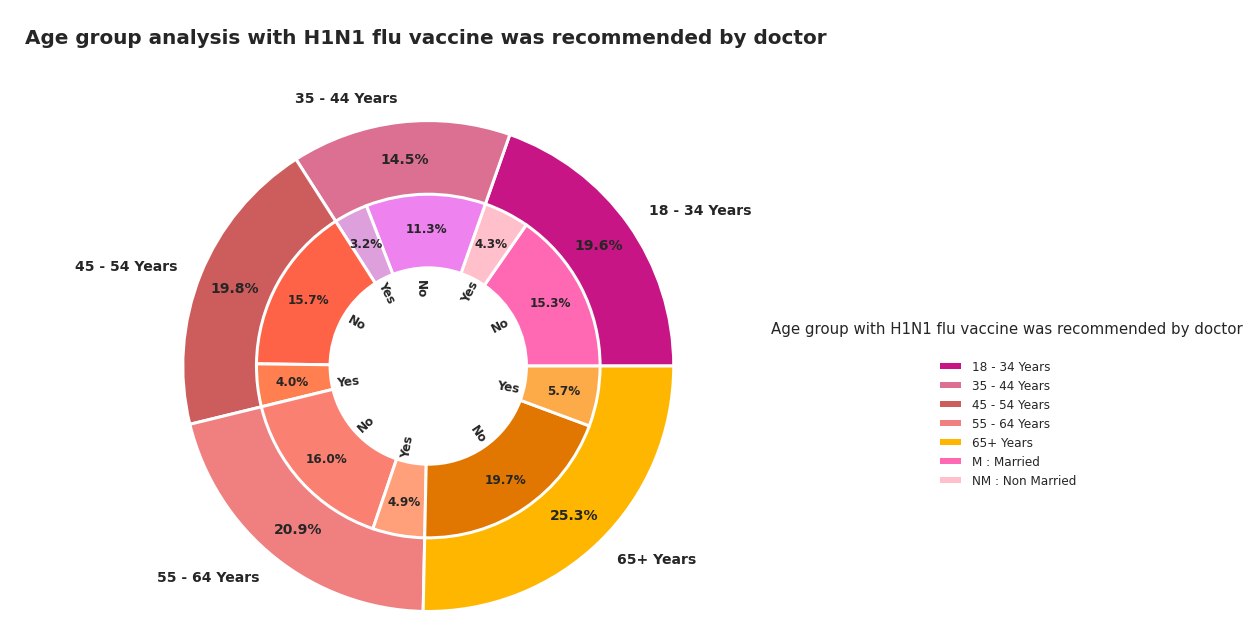

In [ ]:
plt.figure(figsize=(15,10))
plt.title("\nAge group analysis with H1N1 flu vaccine was recommended by doctor\n\n",fontsize=20,fontweight="bold")
plt.pie([4813,3548,4849,5119,6218], radius=1,
        colors=['mediumvioletred', 'palevioletred','indianred','lightcoral',"#FFB600"],
        labels=['18 - 34 Years','35 - 44 Years','45 - 54 Years','55 - 64 Years','65+ Years'], 
        autopct='%.1f%%',
        pctdistance=0.85, textprops = {"fontsize":14,"fontweight":"bold"},
        wedgeprops=dict(width=0.6, edgecolor='white',linewidth=3))

plt.pie([3766,1047,2763,785,3863,986,3919,1200,4828,1390], radius=0.7,
        colors=['hotpink','pink', 'violet',
                'plum', 'tomato','coral', 'salmon','lightsalmon',"#e17701","#fdaa48"],
        wedgeprops=dict(width=0.3, edgecolor='w',linewidth=3),textprops = {"fontsize":12,"fontweight":"bold"},
         labels=["No","Yes","No","Yes","No","Yes","No","Yes","No","Yes"],autopct='%.1f%%',
        pctdistance=0.8, labeldistance=0.4, rotatelabels=True)

legend = plt.legend(bbox_to_anchor=(0.9, 0.6),
          labels=['18 - 34 Years','35 - 44 Years','45 - 54 Years','55 - 64 Years','65+ Years',
                  "M : Married","NM : Non Married"],
          title = "Age group with Marital status indication\n")

legend.set_title("Age group with H1N1 flu vaccine was recommended by doctor\n",prop={"size":15})
legend.draw_frame(False)

plt.axis('equal')
plt.show()

In every age group people, the doctor give No recommendation for H1N1 virus to patient more in number while Yes recommendation for H1N1 virus to patient less in number

## Age analysis with Seasonal flu vaccine was recommended by doctor

In [ ]:
print("\033[1m\nPercent count of age group with Seasonal flu vaccine was recommended by doctor :")
age_vs_doctor_recc_seasonal = pd.crosstab(joined_df['age_group'], joined_df['doctor_recc_seasonal'],margins=True,normalize=True)
round(age_vs_doctor_recc_seasonal.multiply(100),2)


Percent count of age group with Seasonal flu vaccine was recommended by doctor :


doctor_recc_seasonal,0.0,1.0,All
age_group,,,
18 - 34 Years,14.97,4.64,19.61
35 - 44 Years,10.53,3.93,14.45
45 - 54 Years,14.25,5.50,19.75
55 - 64 Years,13.27,7.58,20.85
65+ Years,14.01,11.33,25.33
All,67.03,32.97,100.00


In [ ]:
print("\033[1m\nPercent count of age group with Seasonal flu vaccine was recommended by doctor :")
pd.crosstab(joined_df['age_group'], joined_df['doctor_recc_seasonal'],margins=True)


Percent count of age group with Seasonal flu vaccine was recommended by doctor :


doctor_recc_seasonal,0.0,1.0,All
age_group,,,
18 - 34 Years,3675,1138,4813
35 - 44 Years,2584,964,3548
45 - 54 Years,3498,1351,4849
55 - 64 Years,3258,1861,5119
65+ Years,3438,2780,6218
All,16453,8094,24547


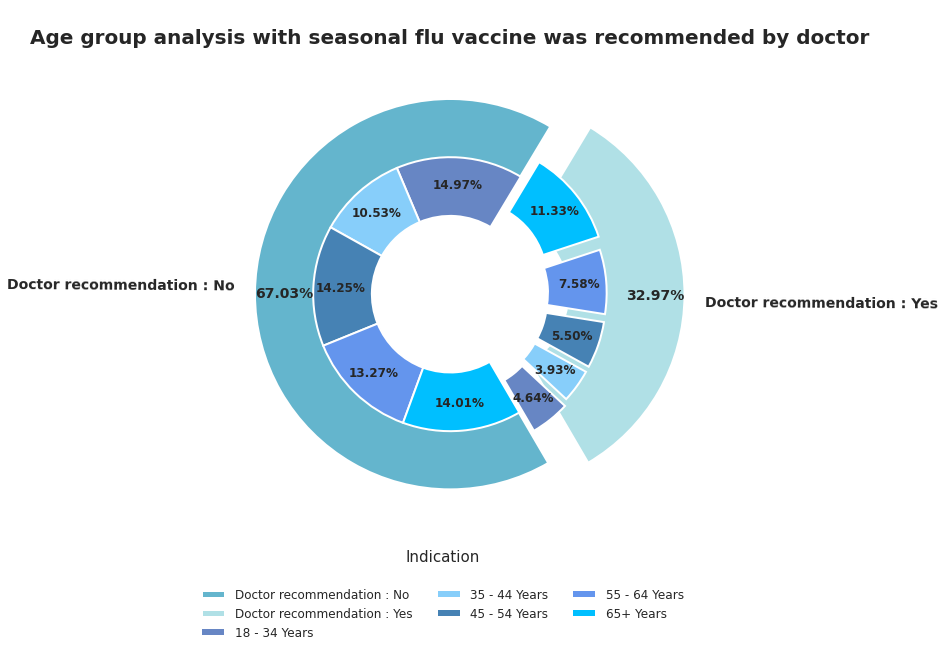

In [ ]:
plt.figure(figsize=(15,9))
plt.title("\nAge group analysis with seasonal flu vaccine was recommended by doctor",fontsize=20,fontweight="bold")
plt.pie([16453,8094], radius=1,
        colors=['c', 'powderblue'],
        labels=['Doctor recommendation : No','Doctor recommendation : Yes'], rotatelabels=True,
        autopct='%.2f%%',
        pctdistance=0.85, textprops = {"fontsize":14,"fontweight":"bold"},startangle=59,explode=[0,0.2],
        wedgeprops=dict(width=0.6, edgecolor='w',linewidth=3))

plt.pie([3675,2584,3498,3258,3438,1138,964,1351,1861,2780], radius=0.7,
        colors=['#6786C4','lightskyblue','steelblue','cornflowerblue','deepskyblue'],
        wedgeprops=dict(width=0.3, edgecolor='w',linewidth=2),textprops = {"fontsize":12,"fontweight":"bold"},
        autopct='%.2f%%',
        pctdistance=0.8, labeldistance=0.4, rotatelabels=True,startangle=59,explode=[0,0,0,0,0,0.12,0.1,0.1,0.1,0.12])

legend = plt.legend(bbox_to_anchor=(1, 0),
          labels=['Doctor recommendation : No','Doctor recommendation : Yes','18 - 34 Years','35 - 44 Years','45 - 54 Years',
                  '55 - 64 Years','65+ Years'],ncol=3,
          title = "Age group with Marital status indication\n")

legend.set_title("Indication\n",prop={"size":15})
legend.draw_frame(False)

In over all dataset, the doctor give No recommendation is about 67.03% while Yes recommendation is about 32.97%<br>
In doctor Yes recommendation, the 65+ year age group have more yes recommendation & 35-44 year age group have less recommendation 


## Opinion analysis of respodent for H1N1 vaccine

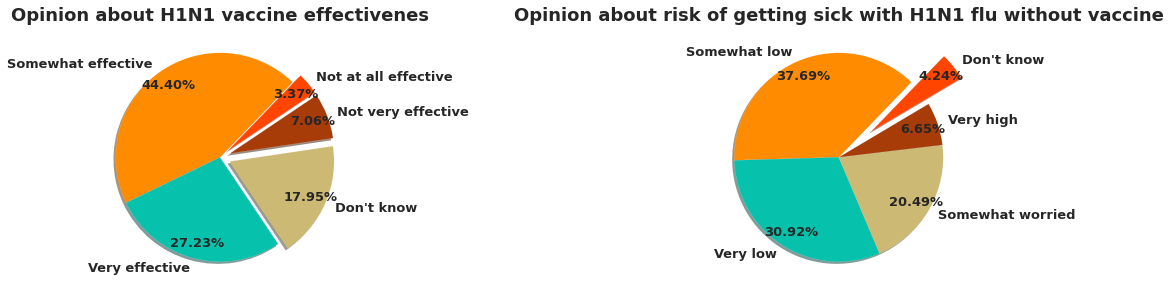

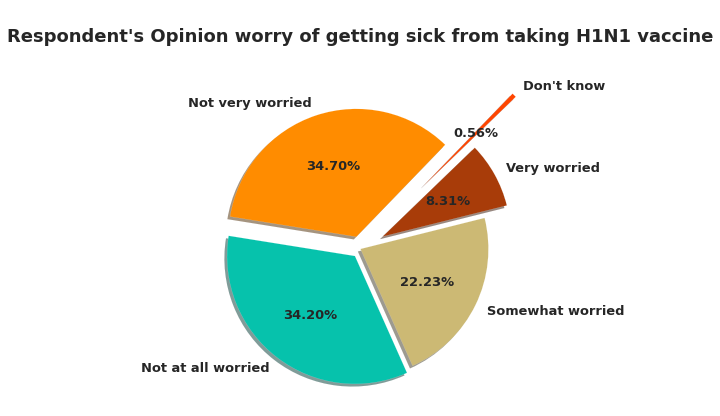

In [ ]:
percent_1=[]
for i in joined_df['opinion_h1n1_vacc_effective'].value_counts():
    percent_1.append(i)
    
percent_2=[]
for i in joined_df['opinion_h1n1_risk'].value_counts():
    percent_2.append(i)
    
percent_3=[]
for i in joined_df['opinion_h1n1_sick_from_vacc'].value_counts():
    percent_3.append(i)

    
wedgeprops = {"linewidth": 0.1, 'width':1, "edgecolor":"w"}
plt.figure(figsize = (18,15))
color = ["darkorange","#06c2ac","y","#a83c09","orangered"]

plt.subplot(1,2,1)
plt.pie(percent_1,labels = ['Somewhat effective', 'Very effective',"Don't know",'Not very effective',
       'Not at all effective',],explode = [0,0,0.1,0.1,0.1], autopct = "%0.2f%%", startangle =46,shadow = True,
        pctdistance = 0.85,wedgeprops = wedgeprops,textprops = {"fontsize":13,"fontweight":"bold"},rotatelabels=False,
        colors = color) 
plt.title("Opinion about H1N1 vaccine effectivenes",fontsize=18,fontweight='bold')
plt.tight_layout(pad=6)

plt.subplot(1,2,2)
plt.pie(percent_2,labels = ['Somewhat low', 'Very low', 'Somewhat worried', 'Very high',
       "Don't know"],explode =[0,0,0,0,0.4], autopct = "%0.2f%%", startangle =46,shadow = True,pctdistance = 0.85,
        wedgeprops = wedgeprops,textprops = {"fontsize":13,"fontweight":"bold"},rotatelabels=False,colors = color) 
plt.title("Opinion about risk of getting sick with H1N1 flu without vaccine",fontsize=18,fontweight='bold')
plt.tight_layout(pad=6)

plt.figure(figsize = (30,20))
plt.subplot(3,3,5)
plt.pie(percent_3,labels = ['Not very worried', 'Not at all worried', 'Somewhat worried', 'Very worried',
       "Don't know"],explode = [0.1,0.07,0.001,0.2,0.7], autopct = "%0.2f%%", startangle =46,pctdistance = 0.58,
        wedgeprops = wedgeprops,textprops = {"fontsize":13,"fontweight":"bold"},rotatelabels=False,shadow = True,
        colors = color)
plt.title("\nRespondent's Opinion worry of getting sick from taking H1N1 vaccine\n\n",fontsize=18,fontweight='bold')

plt.show()

## Opinion analysis of respodent for Seasonal vaccine

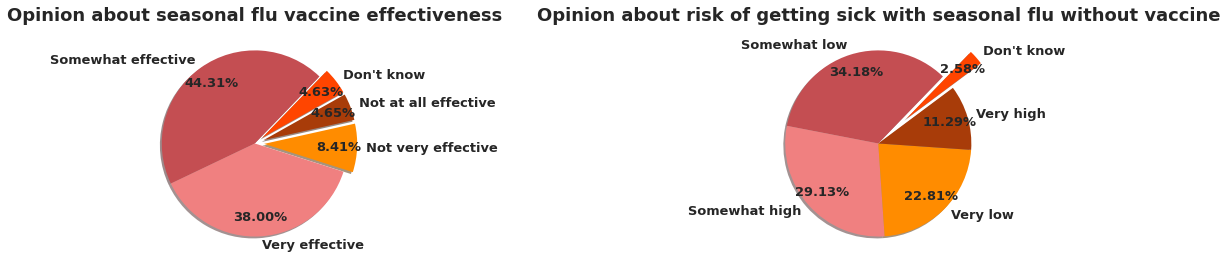

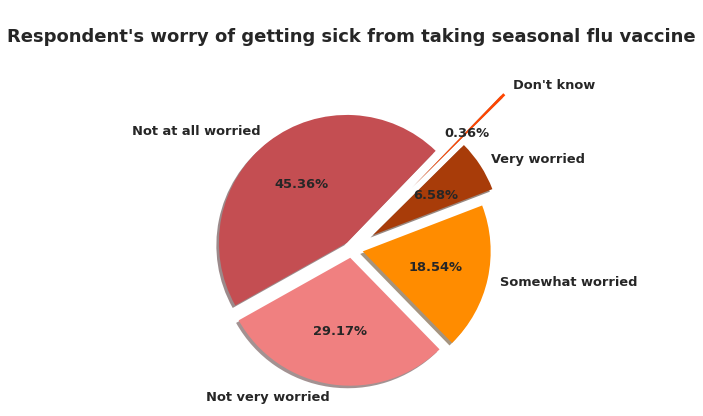

In [ ]:
percent_1=[]
for i in joined_df['opinion_seas_vacc_effective'].value_counts():
    percent_1.append(i)
    
percent_2=[]
for i in joined_df['opinion_seas_risk'].value_counts():
    percent_2.append(i)
    
percent_3=[]
for i in joined_df['opinion_seas_sick_from_vacc'].value_counts():
    percent_3.append(i)

    
wedgeprops = {"linewidth": 0, 'width':1, "edgecolor":"w"}
color = ["r","lightcoral","darkorange","#a83c09","orangered"]

plt.figure(figsize = (18,15))

plt.subplot(1,2,1)
plt.pie(percent_1,labels = ['Somewhat effective', 'Very effective','Not very effective','Not at all effective',
       "Don't know"],explode = [0,0,0.1,0.1,0.1], autopct = "%0.2f%%", startangle =46,shadow = True,pctdistance = 0.8,
        wedgeprops = wedgeprops,textprops = {"fontsize":13,"fontweight":"bold"},rotatelabels=False,colors = color)

plt.title("Opinion about seasonal flu vaccine effectiveness",fontsize=18,fontweight='bold')
plt.tight_layout(pad=6)

plt.subplot(1,2,2)
plt.pie(percent_2,labels = ['Somewhat low', 'Somewhat high', 'Very low','Very high', 
       "Don't know"],explode =[0,0,0,0,0.4], autopct = "%0.2f%%", startangle =46,shadow = True,pctdistance = 0.8,
        wedgeprops = wedgeprops,textprops = {"fontsize":13,"fontweight":"bold"},rotatelabels=False,colors = color) 
plt.title("Opinion about risk of getting sick with seasonal flu without vaccine",fontsize=18,fontweight='bold')
plt.tight_layout(pad=6)

plt.figure(figsize = (30,20))
plt.subplot(3,3,5)
plt.pie(percent_3,labels = ['Not at all worried', 'Not very worried', 'Somewhat worried', 'Very worried',
       "Don't know"],explode = [0.06,0.07,0.09,0.2,0.7], autopct = "%0.2f%%", startangle =46,pctdistance = 0.58,
        colors = color,wedgeprops = wedgeprops,textprops = {"fontsize":13,"fontweight":"bold"},rotatelabels=False,
        shadow = True)
plt.title("\nRespondent's worry of getting sick from taking seasonal flu vaccine\n\n",fontsize=18,fontweight='bold')

plt.show()

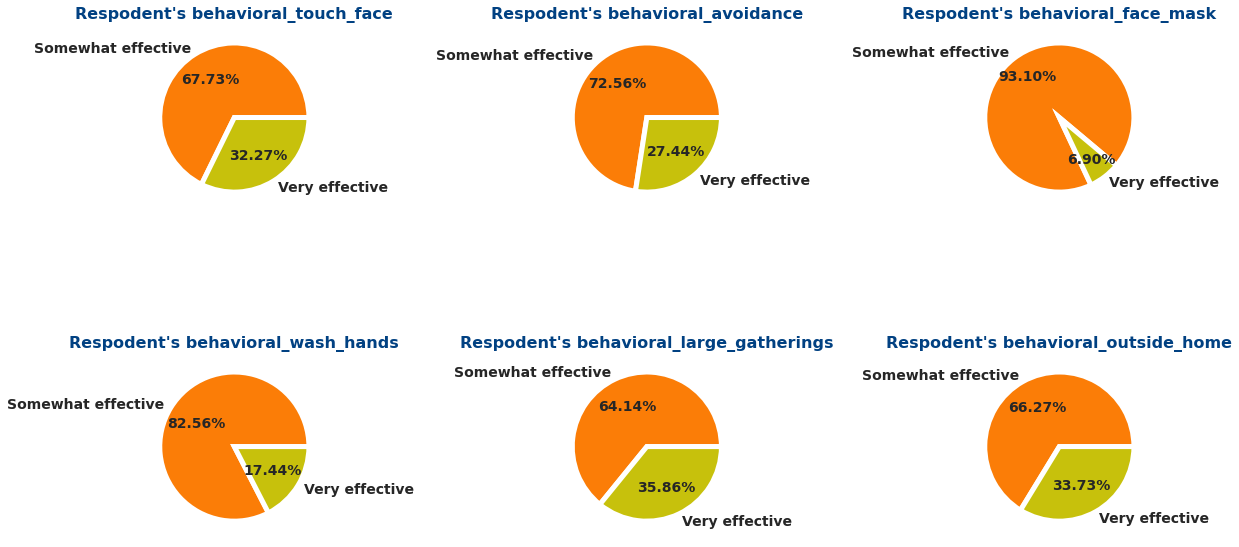

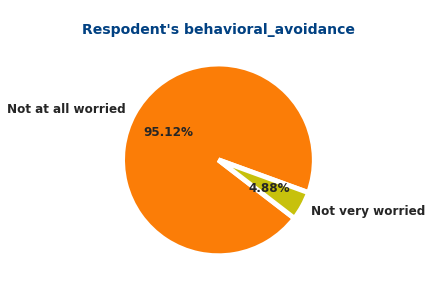

In [ ]:
percent_1=[]
for i in joined_df['behavioral_antiviral_meds'].value_counts():
    percent_1.append(i)

percent_2=[]
for i in joined_df['behavioral_avoidance'].value_counts():
    percent_2.append(i)
    
percent_3=[]
for i in joined_df['behavioral_face_mask'].value_counts():
    percent_3.append(i)
    
percent_4=[]
for i in joined_df['behavioral_wash_hands'].value_counts():
    percent_4.append(i)
    
percent_5=[]
for i in joined_df['behavioral_large_gatherings'].value_counts():
    percent_5.append(i)
    
percent_6=[]
for i in joined_df['behavioral_outside_home'].value_counts():
    percent_6.append(i)
    
percent_7=[]
for i in joined_df['behavioral_touch_face'].value_counts():
    percent_7.append(i)

    
wedgeprops = {"linewidth": 5, 'width':1, "edgecolor":"w"}
color = ["#fb7d07","#c7c10c"]
plt.figure(figsize = (18,15))

plt.subplot(3,3,1)
plt.pie(percent_7,labels = ['Somewhat effective', 'Very effective'], autopct = "%0.2f%%", startangle =0,
        wedgeprops = wedgeprops,textprops = {"fontsize":14,"fontweight":"bold"},rotatelabels=False,colors=color)
title_obj = plt.title("Respodent's behavioral_touch_face",fontsize=16,fontweight='bold')
plt.setp(title_obj, color='#014182')
plt.tight_layout(pad=2)


plt.subplot(3,3,2)
plt.pie(percent_2,labels = ['Somewhat effective', 'Very effective'], autopct = "%0.2f%%", startangle =0,
        wedgeprops = wedgeprops,textprops = {"fontsize":14,"fontweight":"bold"},rotatelabels=False,colors=color) 
title_obj = plt.title("Respodent's behavioral_avoidance",fontsize=16,fontweight='bold')
plt.setp(title_obj, color='#014182')
plt.tight_layout(pad=2)

plt.subplot(3,3,3)
plt.pie(percent_3,labels = ['Somewhat effective', 'Very effective'], autopct = "%0.2f%%", startangle =320,colors=color,
        wedgeprops = wedgeprops,textprops = {"fontsize":14,"fontweight":"bold"},rotatelabels=False,pctdistance=0.7) 
title_obj = plt.title("Respodent's behavioral_face_mask",fontsize=16,fontweight='bold')
plt.setp(title_obj, color='#014182')
plt.tight_layout(pad=2)


plt.subplot(3,3,4)
plt.pie(percent_4,labels = ['Somewhat effective', 'Very effective'], autopct = "%0.2f%%", startangle =0,colors=color,
        wedgeprops = wedgeprops,textprops = {"fontsize":14,"fontweight":"bold"},rotatelabels=False,) 
title_obj = plt.title("Respodent's behavioral_wash_hands",fontsize=16,fontweight='bold')
plt.setp(title_obj, color='#014182')
plt.tight_layout(pad=2)

plt.subplot(3,3,5)
plt.pie(percent_5,labels = ['Somewhat effective', 'Very effective'], autopct = "%0.2f%%", startangle =0,colors=color,
        wedgeprops = wedgeprops,textprops = {"fontsize":14,"fontweight":"bold",},rotatelabels=False,) 
title_obj = plt.title("Respodent's behavioral_large_gatherings",fontsize=16,fontweight='bold')
plt.setp(title_obj, color='#014182')
plt.tight_layout(pad=2)

plt.subplot(3,3,6)
plt.pie(percent_6,labels = ['Somewhat effective', 'Very effective'], autopct = "%0.2f%%", startangle =0,colors=color,
        wedgeprops = wedgeprops,textprops = {"fontsize":14,"fontweight":"bold",},rotatelabels=False,) 
title_obj = plt.title("Respodent's behavioral_outside_home",fontsize=16,fontweight='bold')
plt.setp(title_obj, color='#014182')
plt.tight_layout(pad=2)

plt.figure(figsize=(18,15))
plt.subplot(3,3,2)
plt.pie(percent_1,labels = ['Not at all worried', 'Not very worried'], autopct = "%0.2f%%", startangle =340,pctdistance=0.6,
        wedgeprops = wedgeprops,textprops = {"fontsize":12,"fontweight":"bold"},rotatelabels=False,colors=color)
title_obj = title_obj = plt.title("\nRespodent's behavioral_avoidance",fontsize=14,fontweight='bold')
plt.setp(title_obj, color='#014182') 

plt.show()

## Overall analysis with target variable

In [ ]:
def vaccination_rate_plot(col, target, data, ax=None):
    """Stacked bar chart of vaccination rate for `target` against 
    `col`. 
    
    Args:
        col (string): column name of feature variable
        target (string): column name of target variable
        data (pandas DataFrame): dataframe that contains columns 
            `col` and `target`
        ax (matplotlib axes object, optional): matplotlib axes 
            object to attach plot to
    """
    counts = (joined_df[[target, col]]
                  .groupby([target, col])
                  .size()
                  .unstack(target)
             )
    group_counts = counts.sum(axis='columns')
    props = counts.div(group_counts, axis='index')
    props.plot(kind="bar",ax=ax,rot=0)

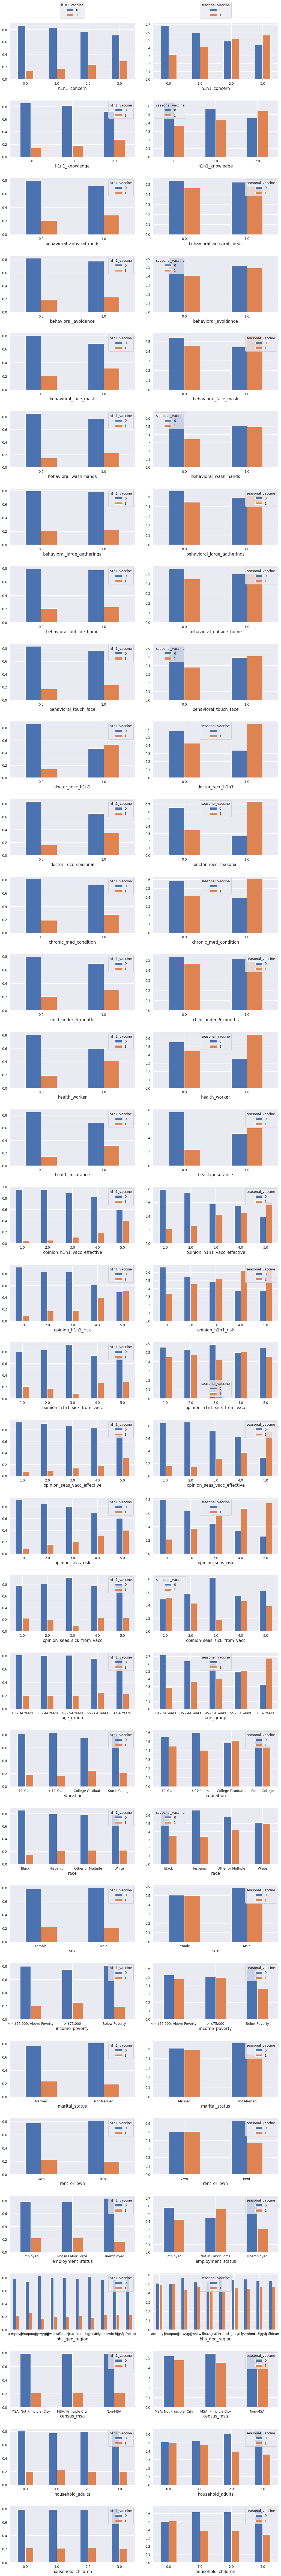

In [ ]:
sns.set(rc={"font.size":15,"axes.titlesize":15,"axes.labelsize":15,"xtick.labelsize":12,"ytick.labelsize":12,
            "legend.fontsize":12})
cols_to_plot = [
    'h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children'
]

fig, ax = plt.subplots(
    len(cols_to_plot), 2, figsize=(15,len(cols_to_plot)*4)
)
for idx, col in enumerate(cols_to_plot):
    vaccination_rate_plot(
        col,'h1n1_vaccine', joined_df, ax=ax[idx, 0]
    )
    vaccination_rate_plot(
        col,'seasonal_vaccine', joined_df, ax=ax[idx, 1]
    )
    
ax[0, 0].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='h1n1_vaccine'
)
ax[0, 1].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='seasonal_vaccine'
)
fig.tight_layout(pad=2)